In [4]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns 
from matplotlib.patches import Ellipse
import random

mu = np.zeros((3,2))
pi = np.zeros((3))
cov = np.zeros((3,2,2))

with open('D4.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    train_X = []
    train_Y = []
    
    for row in csv_reader:
        train_X.append(row[0])
        train_Y.append(row[1])

train_X = np.array(train_X)
train_X = train_X.astype(float)
train_Y = np.array(train_Y)  
train_Y = train_Y.astype(float)
X = np.zeros((len(train_X),2))
X[:,0] = train_X
X[:,1]=train_Y

def probability_fun(x,mu,cov):
    det = math.sqrt(np.abs(np.linalg.det(cov)))
    det1 = det
    const = ((2*math.pi)**(len(x)/2))*det1
    x_mu = np.matrix(x-mu)
    x_mu1 = x_mu
    x_mu2 = x_mu1
    x_mu_T = np.transpose(x_mu2)
    find_temp_val(0)
    inv = np.linalg.inv(cov)
    return (1/const)*math.exp(-0.5*(x_mu*inv*x_mu_T))

def E_step():
    global X
    global mu,pi,cov
    global gamma
    global log_likelihood
    global clusters
    
    ans = 0
    gamma = np.zeros((len(X),clusters))
    for i in range(len(X)):
        likelihood = 0
        temp2 = i
        for j in range(clusters):
            find_temp_val(temp2)
            gamma[i][j] = pi[j]*probability_fun(X[i],mu[j],cov[j])
            temp3 = temp2
            find_temp_val(temp3)
            likelihood += gamma[i][j]

        ans = ans + np.log(likelihood)    
        find_temp_val(temp2)
        gamma[i] = gamma[i] / np.sum(gamma[i])
        
    log_likelihood.append(ans)


def M_step():
    global mu,pi,cov
    global log_likelihood
    global X
    global clusters
    global gamma
    for i in range(clusters):
        temp1 =i
        mu[i] = np.sum(gamma[:, i, np.newaxis] * X, axis=0)/np.sum(gamma[:,i])
        for j in range(X.shape[0]):
            find_temp_val(temp1)
            diff = (X[j] - mu[i]).reshape((-1, 1))
            diff1 = diff
            find_temp_val(temp1)
            diff1_t = diff.T
            cov[i] += gamma[j][i] * np.dot(diff1, diff1_t)
            find_temp_val(temp1)
        pi[i] = np.sum(gamma[:,i])/len(X)    
        cov[i] /= np.sum(gamma[:,i])

def plot_results(X, means, covariances, resps, k, title): 
    fig, ax = plt.subplots(figsize=(6,6)) 
    #colors = sns.color_palette('Set1', n_colors=k) 
    temp1 =0
    colors = ['m','k','c','#FFD700','#FA8072','#00FF00','r'] 
    find_temp_val(temp1)
    plt.title(title)

    for j in range(k):
        temp1 =j
        mask = resps[:, j] > 0.5
        find_temp_val(temp1)
        plot_gmm(X[mask], [means[j]], [covariances[j]], ax=ax, color=colors[j])

    plt.show()    

def find_temp_val(val):
    val1 = 2 + val   

def plot_gmm(X, means, covariances, ax=None, color='red'):

    if ax is None: 
        ax = plt.gca() 
    val2 = 0
    find_temp_val(val2)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=color, alpha=0.6)

    len_val = len(means)
    for i in range(len_val):
        mean = means[i]
        mean1 = mean
        covariance = covariances[i]
        covariance1 = covariance
        eigenvalues, eigenvectors = np.linalg.eigh(covariance1)
        angle = np.degrees(np.arctan2(*eigenvectors[0][::-1]))
        mean2 = mean1
        covariance2 = covariance
        width, height = 2 * np.sqrt(5.991 * eigenvalues)
        ellip = Ellipse(xy=mean2, width=width, height=height, angle=angle, alpha=0.5, color=color)
        temp_val = 0
        find_temp_val(temp_val)
        ellip.set_facecolor('none')
        ax.add_artist(ellip)
        



with open('D4.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    train_X = []
    train_Y = []
    
    for row in csv_reader:
        train_X.append(row[0])
        train_Y.append(row[1])

train_X = np.array(train_X)
train_X = train_X.astype(float)
train_Y = np.array(train_Y)  
train_Y = train_Y.astype(float)
X = np.zeros((len(train_X),2))
X[:,0] = train_X
X[:,1]=train_Y

def plot_log_likelihood(likelihood_list):
    plt.plot(likelihood_list)
    plt.xlabel("no_of_iterations")
    plt.ylabel("log_likelihood")
    plt.title("log_likelihood vs no_of_iterations for clusters = " + str(clusters))
    plt.show()

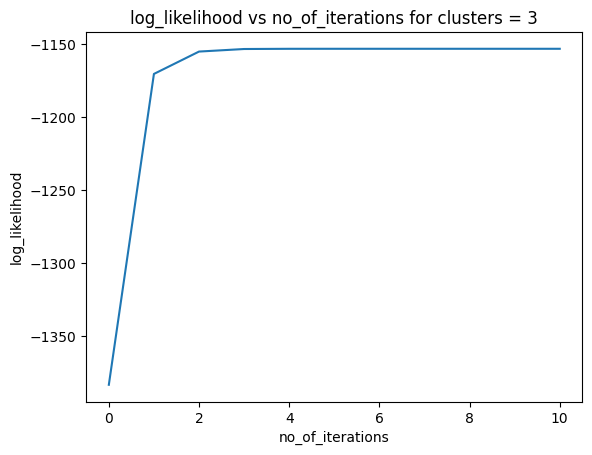

In [5]:
mu = np.zeros((3,2))
pi = np.zeros((3))
cov = np.zeros((3,2,2))

log_likelihood = list()
tolerance = 0.000001
clusters = 3

for i in range(clusters):
    cov[i] = np.identity(2)
    mu[i] = X[random.randint(0,len(X)-1)]
    pi[i] = 1/clusters

for i in range(100):
    #Calculating Expectation and Maximization
    E_step()
    M_step()

    #termination condition when graph converges
    if len(log_likelihood) >= 2 and np.abs(log_likelihood[-1] - log_likelihood[-2]) < tolerance:
        break
        
        
plot_log_likelihood(log_likelihood)
        
    

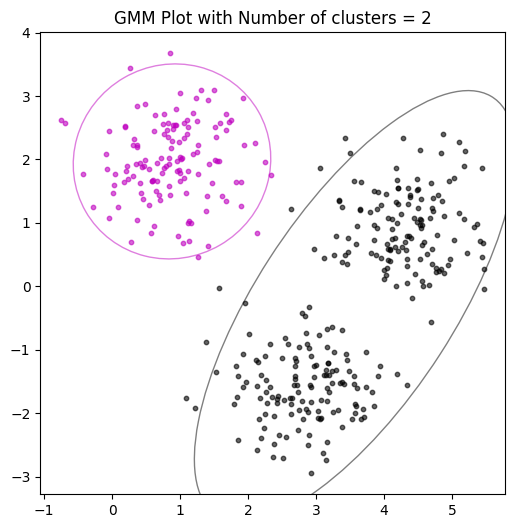

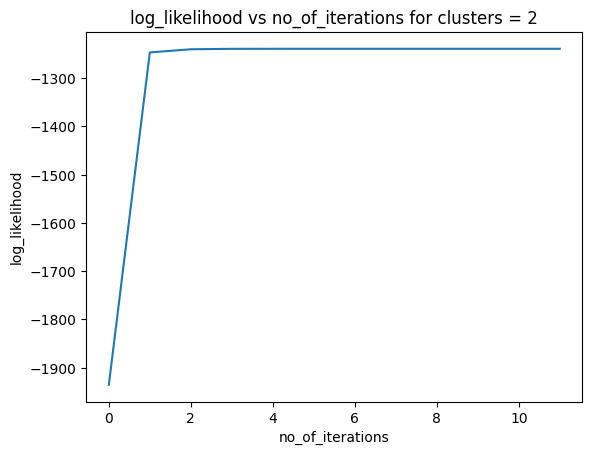

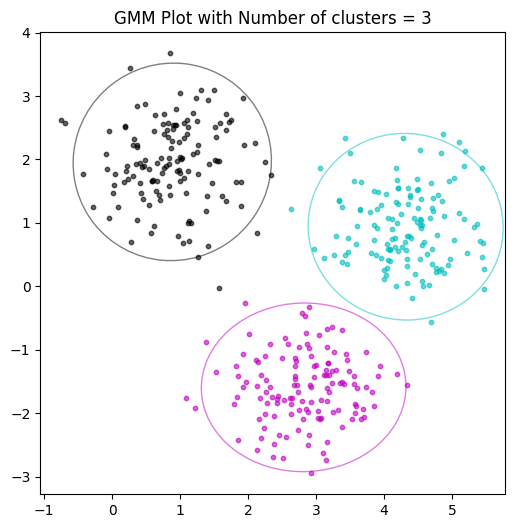

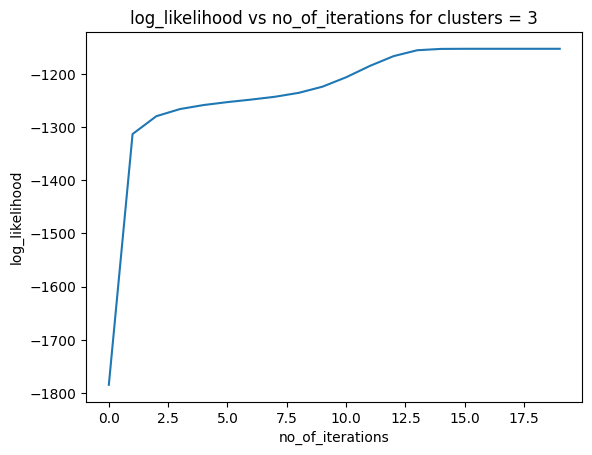

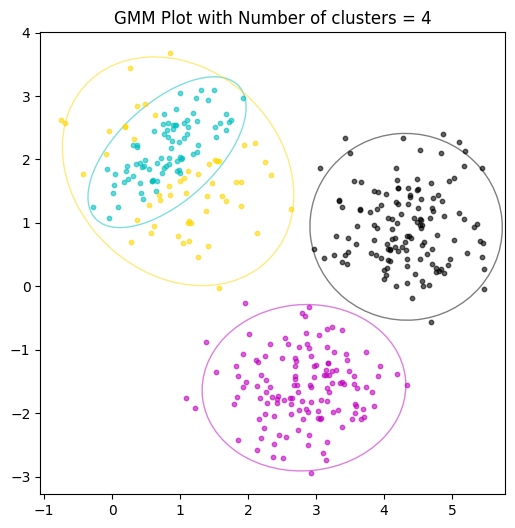

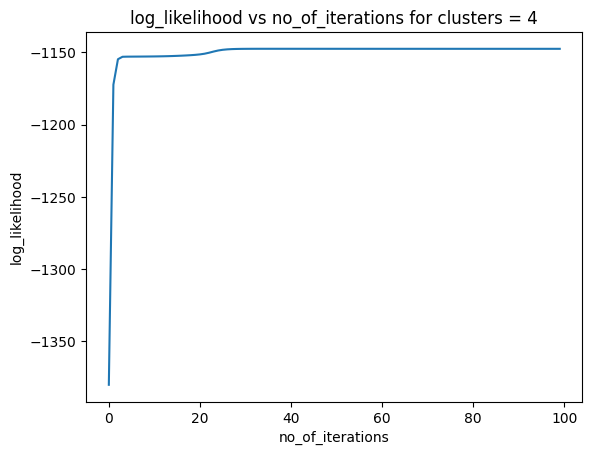

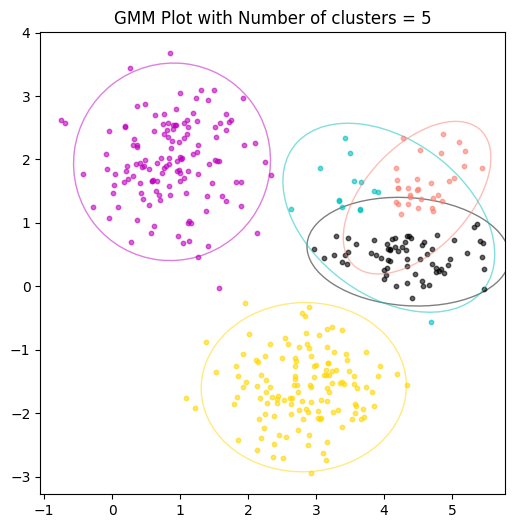

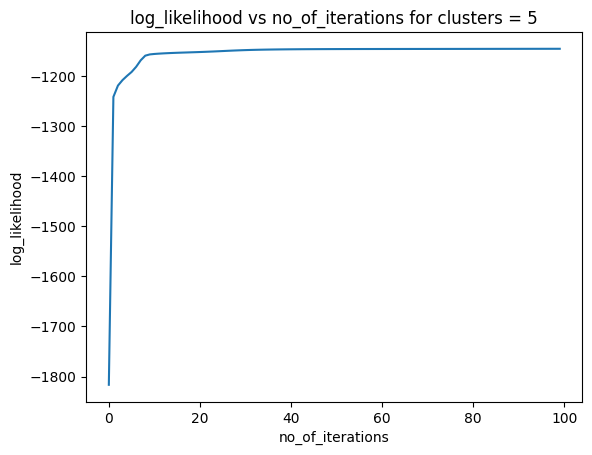

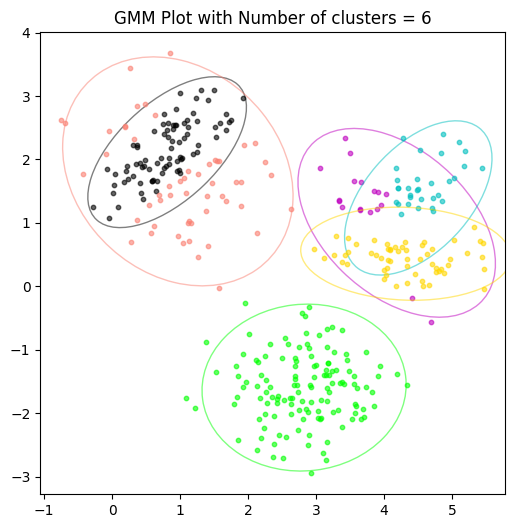

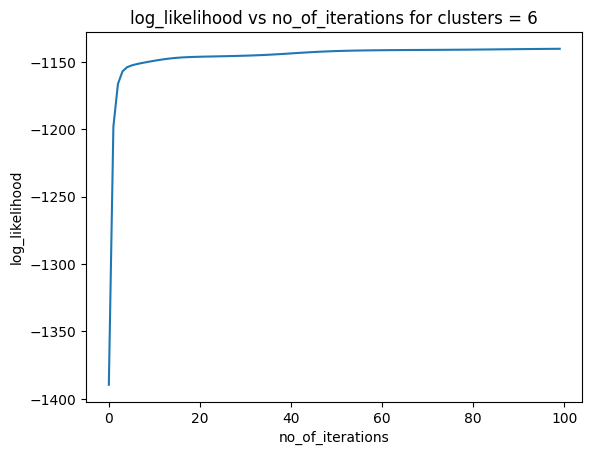

In [6]:
for clusters in range(2,7): 
    mu = np.zeros((clusters,2)) 
    pi = np.zeros((clusters)) 
    cov = np.zeros((clusters,2,2))

    log_likelihood = list()
    tolerance = 0.00001

    #initial values of mu,pi,cov
    for i in range(clusters):
        cov[i] = np.identity(2)
        mu[i] = X[random.randint(0,len(X)-1)]
        pi[i] = 1/clusters

    for i in range(100):
        #Calculating Expectation and Maximization
        E_step()
        M_step()

        #termination condition when graph converges
        if len(log_likelihood) >= 2 and np.abs(log_likelihood[-1] - log_likelihood[-2]) < tolerance:
            break
    plot_results(X, mu, cov, gamma, clusters, 'GMM Plot with Number of clusters = {}'.format(clusters))
    plot_log_likelihood(log_likelihood)

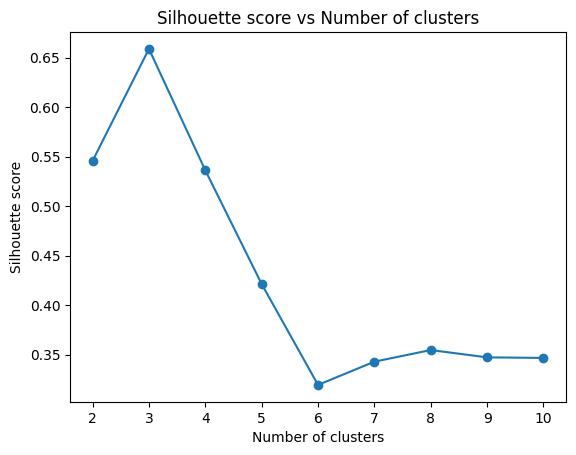

The optimal number of clusters based on Silhouette score is: 3


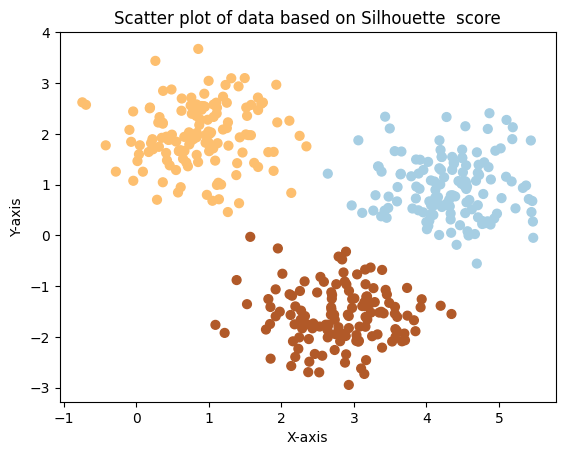

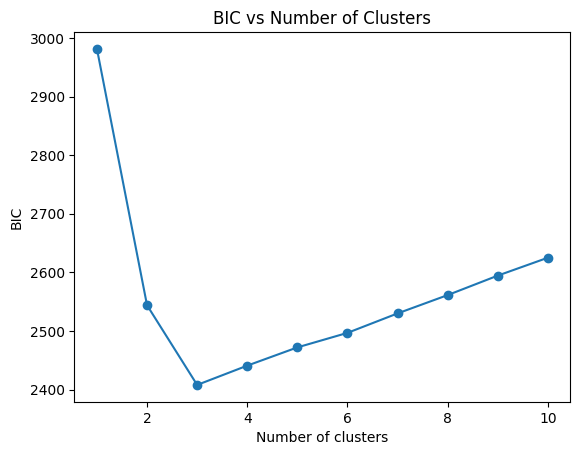

The optimal number of clusters based on BIC score is: 3


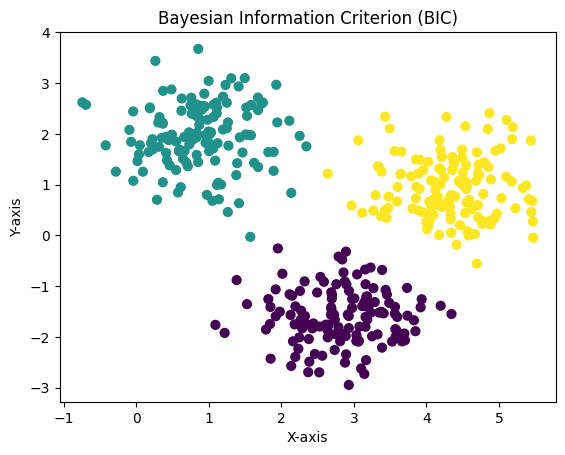

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Load your data into a numpy array called X

# Fit KMeans models for different number of clusters
silhouette_scores = []
n_clusters_range = range(2, 11)
for n_clusters in n_clusters_range:
    # Fit the KMeans model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init=5).fit(X)
    labels = kmeans.labels_
    # Calculate the silhouette score for this model
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different number of clusters
import matplotlib.pyplot as plt
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.show()

# Get the optimal number of clusters based on the highest Silhouette score
optimal_n_clusters = np.argmax(silhouette_scores) + 2
print("The optimal number of clusters based on Silhouette score is:", optimal_n_clusters)

# Get the cluster labels for the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0,n_init=5).fit(X)
labels = kmeans.labels_

# Plot the scatter plot for the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Paired')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of data based on Silhouette  score')
plt.show()


#For BIC

from sklearn.mixture import GaussianMixture
import numpy as np

lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    # Fit the GMM model with n_components
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

# Plot the BIC scores for different number of clusters
import matplotlib.pyplot as plt
plt.plot(n_components_range, bic, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of Clusters')
plt.show()

# Get the optimal number of clusters based on the lowest BIC score
optimal_n_components = best_gmm.n_components
print("The optimal number of clusters based on BIC score is:", optimal_n_components)

# Get the cluster labels for the optimal number of clusters
labels = best_gmm.predict(X)

# Plot the scatter plot for the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bayesian Information Criterion (BIC)')
plt.show()